# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [5]:
#Import all the necessary modules

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [7]:
pima_df = pd.read_csv("pima-indians-diabetes-2.data")

In [8]:
pima_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [9]:
pima_df.columns

Index([u'6', u'148', u'72', u'35', u'0', u'33.6', u'0.627', u'50', u'1'], dtype='object')

In [10]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'glu', 'bp', 'st', 'ins', 'bmi', 'dpf', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes-2.data", names= colnames)

In [11]:
pima_df.head()

,preg,glu,bp,st,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [12]:
pima_df.sample(10)

,preg,glu,bp,st,ins,bmi,dpf,age,class
156,2,99,52,15,94,24.6,0.637,21,0
354,3,90,78,0,0,42.7,0.559,21,0
326,1,122,64,32,156,35.1,0.692,30,1
272,3,122,78,0,0,23.0,0.254,40,0
124,0,113,76,0,0,33.3,0.278,23,1
162,0,114,80,34,285,44.2,0.167,27,0
734,2,105,75,0,0,23.3,0.560,53,0
184,4,141,74,0,0,27.6,0.244,40,0
154,8,188,78,0,0,47.9,0.137,43,1
647,0,179,50,36,159,37.8,0.455,22,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [13]:
pima_df.dtypes

preg       int64
glu        int64
bp         int64
st         int64
ins        int64
bmi      float64
dpf      float64
age        int64
class      int64
dtype: object

In [14]:
pima_df.shape

(768, 9)

In [15]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
glu      768 non-null int64
bp       768 non-null int64
st       768 non-null int64
ins      768 non-null int64
bmi      768 non-null float64
dpf      768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [16]:
pima_df.loc[:,(pima_df!=0).any(axis=0)]

,preg,glu,bp,st,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [24]:
pima_df.loc[pima_df['preg']==0|np.isnan(pima_df['preg']),'preg']=pima_df['preg'].median()## changed the pregnancy column 
## with median while with domain experience/otherwise it is not important to change this column since there can be cases
##with zero pregnancy. Pl share in your feedback at the time of assessment, if change is made in original dataframe how to
## undo the same like in this case.
pima_df.loc[pima_df['glu']==0|np.isnan(pima_df['glu']),'glu']=pima_df['glu'].median()
pima_df.loc[pima_df['bp']==0|np.isnan(pima_df['bp']),'bp']=pima_df['bp'].median()
pima_df.loc[pima_df['st']==0|np.isnan(pima_df['st']),'st']=pima_df['st'].median()
pima_df.loc[pima_df['ins']==0|np.isnan(pima_df['ins']),'ins']=pima_df['ins'].median()
pima_df.loc[pima_df['bmi']==0|np.isnan(pima_df['bmi']),'bmi']=pima_df['bmi'].median()

In [25]:
pima_df.head(20)

,preg,glu,bp,st,ins,bmi,dpf,age,class
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,72.0,23.0,30.5,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,23.0,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [26]:
pima_df.describe()

,preg,glu,bp,st,ins,bmi,dpf,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [27]:
pima_df.groupby(['class']).count()

## Most are not diabetic. The ratio is almost 1:2 in favor of class 0. The model's ability to predict class 0 will be better 
## than predicting class 1

,preg,glu,bp,st,ins,bmi,dpf,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

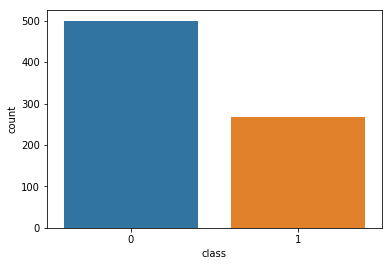

In [28]:
sns.countplot(x='class',data=pima_df)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [29]:
pima_df.corr()

,preg,glu,bp,st,ins,bmi,dpf,age,class
preg,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
glu,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
bp,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
st,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
ins,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
bmi,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
dpf,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


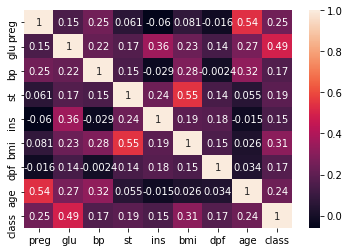

In [30]:
sns.heatmap(pima_df.corr(),annot=True)
plt.show()

##Observations:The diagonal of the below matirx shows the auto-correlation of the variables. It is always 1.
## We can observe that the correlation between Pregnancy and Age is highest i.e. 0.54 and then weakest between Pregnancy
## and dpf i.e. 0.016. There is high correlation of over .5 i.e .55. However most of the variables have weak coorelation 
## themselves 
##Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative 
##correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probable 
##candidates for model builing.

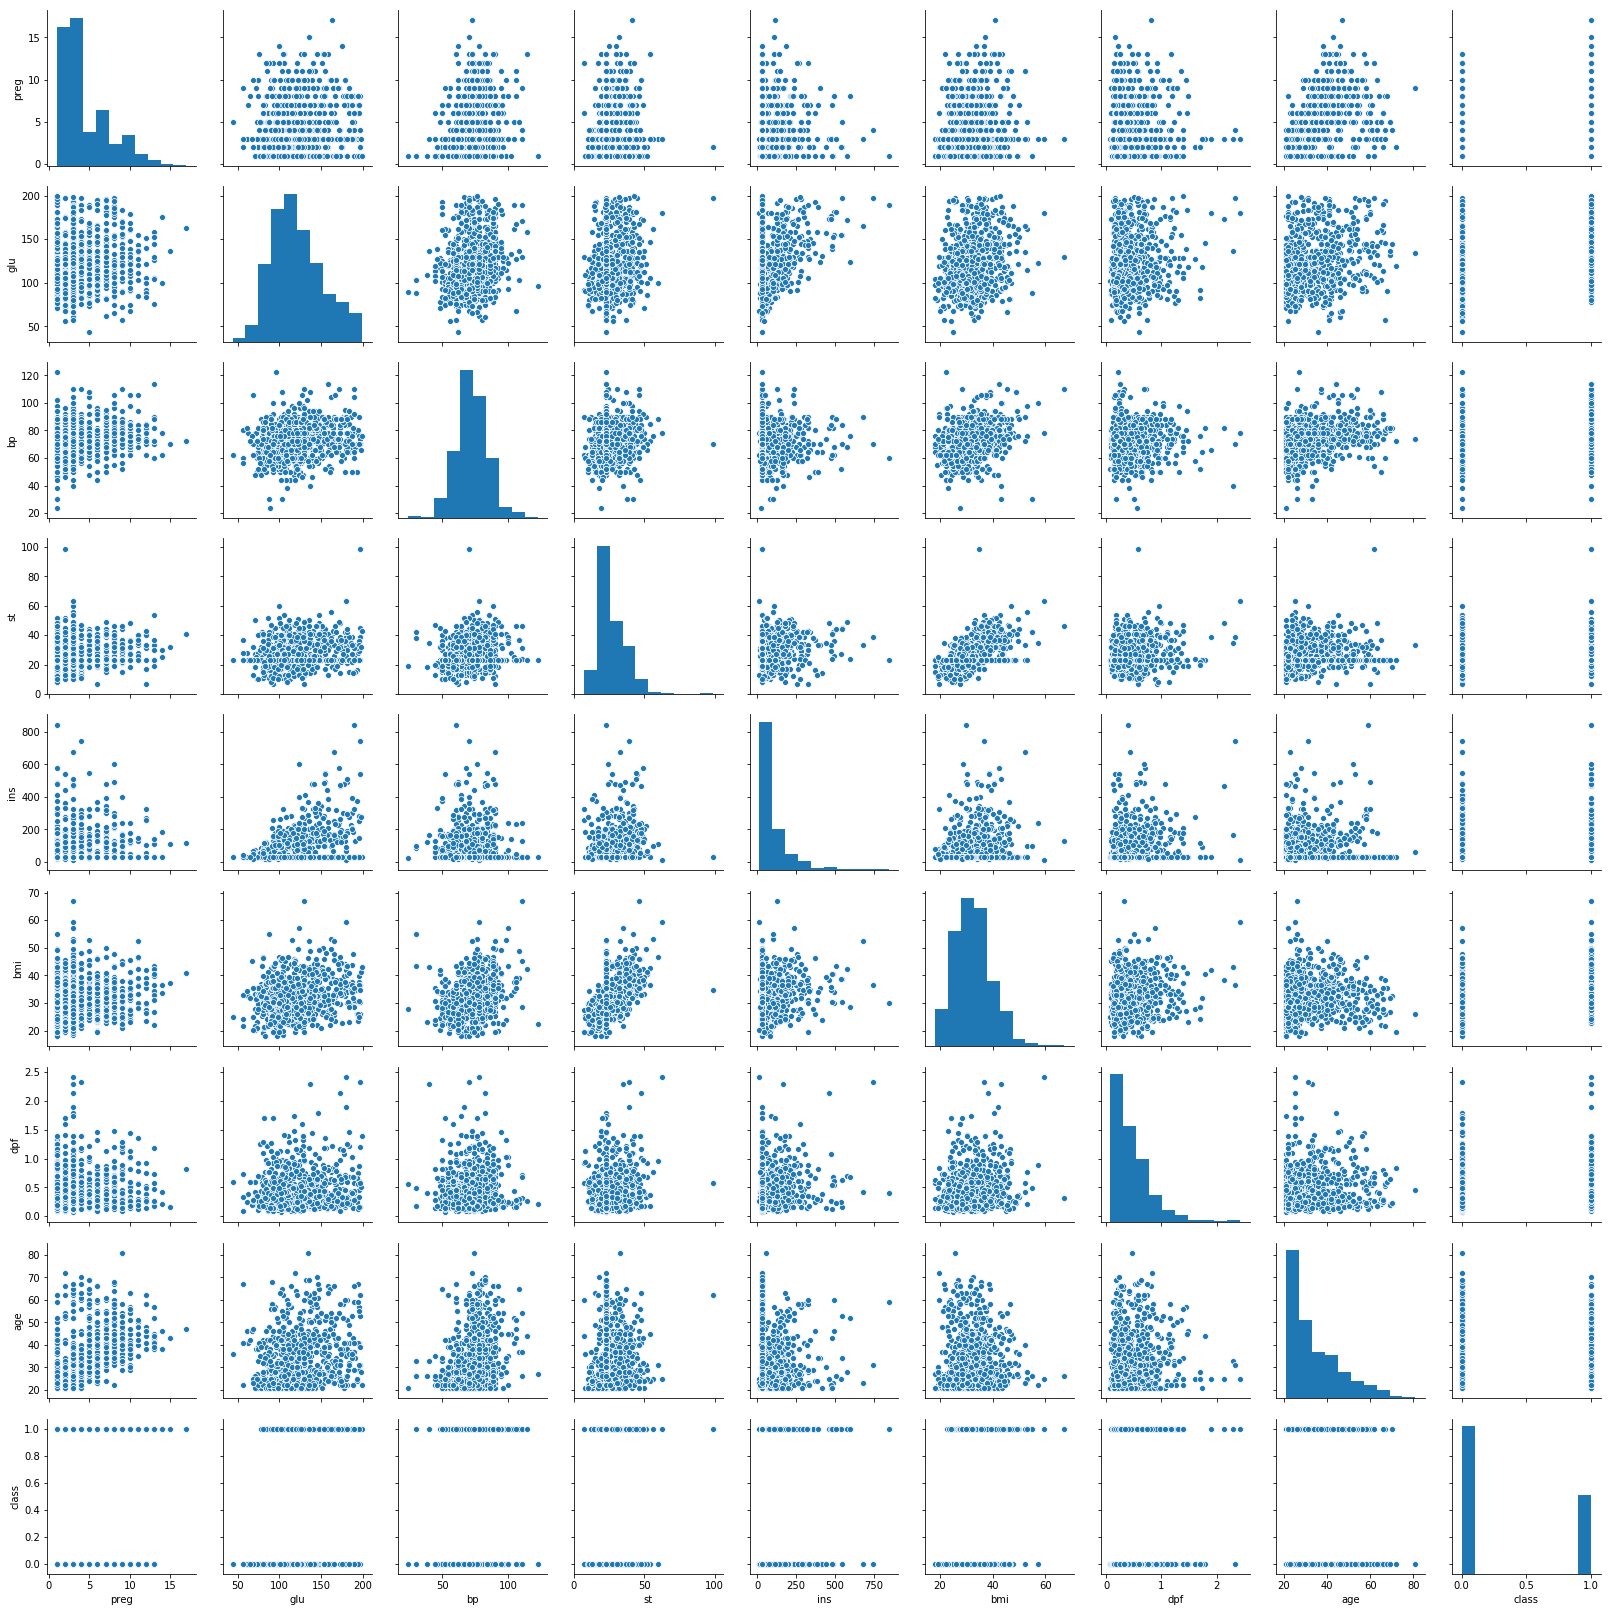

In [33]:
sns.pairplot(pima_df)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]

In [36]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [37]:
X_train.head(2)

,preg,glu,bp,st,ins,bmi,dpf,age
590,11.0,111.0,84.0,40.0,30.5,46.8,0.925,45
692,2.0,121.0,70.0,32.0,95.0,39.1,0.886,23


In [38]:
y_train.head(2)

590    1
692    0
Name: class, dtype: int64

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [39]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 
#  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [40]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [41]:
dt_model.score(X_train , y_train)

1.0

In [42]:
dt_model.score(X_test , y_test)

0.7316017316017316

In [71]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,min_samples_leaf=50,random_state=7) 
### regularising the decision tree to improve accuracy

In [72]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [73]:
dt_model.score(X_train , y_train)

0.7690875232774674

In [74]:
dt_model.score(X_test , y_test)

0.7402597402597403

In [75]:
from sklearn import metrics

In [76]:
metrics.confusion_matrix(y_train,dt_model.predict(X_train))

array([[313,  40],
       [ 84, 100]], dtype=int64)

In [77]:
metrics.confusion_matrix(y_test,dt_model.predict(X_test))

array([[130,  17],
       [ 43,  41]], dtype=int64)

Print the feature importance of the decision model - Optional

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfcl = RandomForestClassifier(criterion = 'entropy',n_estimators = 120, max_depth=3,random_state=7)
#rfcl = RandomForestClassifier(n_estimators = 100, max_depth=5, max_features=0.25, max_leaf_nodes=20)

In [79]:
rfcl = rfcl.fit(X_train, y_train)

In [80]:
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [81]:
rfcl.score(X_train, y_train)

0.8063314711359404

In [82]:
rfcl.score(X_test, y_test)

0.7402597402597403

# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf=3,random_state=7)

In [96]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=5)

In [97]:
abcl

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None)

In [98]:
abcl = abcl.fit(X_train, y_train)

In [99]:
abcl.score(X_train, y_train)

0.8268156424581006

In [100]:
abcl.score(X_test,y_test)

0.7532467532467533

# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [101]:
from sklearn.ensemble import BaggingClassifier

In [102]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf=10,random_state=7 )

In [103]:
bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=50)
#bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

In [104]:
bgcl

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [105]:
bgcl = bgcl.fit(X_train, y_train)

In [106]:
bgcl.score(X_train , y_train)

0.7895716945996276

In [107]:
bgcl.score(X_test , y_test)

0.7575757575757576

# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbcl = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.09,max_depth=3)

In [110]:
gbcl

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.09, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [111]:
gbcl = gbcl.fit(X_train, y_train)

In [112]:
gbcl.score(X_train , y_train)

0.7932960893854749

In [113]:
gbcl.score(X_test, y_test)

0.7489177489177489